## Using Ordinal Encoder

In [407]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

In [344]:
data = pd.read_csv("lab01_dataset_2.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [345]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [346]:
print(data.columns)
data.shape

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Output'], dtype='object')


(200, 6)

In [347]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Output          object
dtype: object

In [348]:
print("Gender Unique : " + data['Sex'].unique())
print("BP Unique : " + data['BP'].unique())
print("Cholesterol Unique : " + data['Cholesterol'].unique())
print("Output Unique : " + data['Output'].unique())

['Gender Unique : F' 'Gender Unique : M']
['BP Unique : HIGH' 'BP Unique : LOW' 'BP Unique : NORMAL']
['Cholesterol Unique : HIGH' 'Cholesterol Unique : NORMAL']
['Output Unique : drugY' 'Output Unique : drugC' 'Output Unique : drugX'
 'Output Unique : drugA' 'Output Unique : drugB']


In [349]:
genderUniqueArray = list(np.asarray(data['Sex'].unique()))
bpUniqueArray = list(np.asarray(data['BP'].unique()))
cholesterolUniqueArray = list(np.asarray(data['Cholesterol'].unique()))
outputUniqueArray = list(np.asarray(data['Output'].unique()))

print(list(genderUniqueArray))
print(list(bpUniqueArray))
print(list(cholesterolUniqueArray))
print(list(outputUniqueArray))

['F', 'M']
['HIGH', 'LOW', 'NORMAL']
['HIGH', 'NORMAL']
['drugY', 'drugC', 'drugX', 'drugA', 'drugB']


In [350]:
encoderGender = OrdinalEncoder(categories=[list(genderUniqueArray)])
encoderBP = OrdinalEncoder(categories=[list(bpUniqueArray)])
encoderCholesterol = OrdinalEncoder(categories=[list(cholesterolUniqueArray)])
encoderOutput = OrdinalEncoder(categories=[list(outputUniqueArray)])

data['Sex'] = encoderGender.fit_transform(data[['Sex']])
data['BP'] = encoderBP.fit_transform(data[['BP']])
data['Cholesterol'] = encoderCholesterol.fit_transform(data[['Cholesterol']])
data['Output'] = encoderOutput.fit_transform(data[['Output']])

In [351]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,1.0
2,47,1.0,1.0,0.0,10.114,1.0
3,28,0.0,2.0,0.0,7.798,2.0
4,61,0.0,1.0,0.0,18.043,0.0


In [352]:
X = data.drop("Output", axis = 1)
Y = data['Output']

In [353]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043


In [354]:
Y.head()

0    0.0
1    1.0
2    1.0
3    2.0
4    0.0
Name: Output, dtype: float64

In [355]:
print(X.shape)
print(Y.shape)

(200, 5)
(200,)


In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state = 12)

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(180, 5)
(20, 5)
(180,)
(20,)


In [357]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)

y_pred = decisionTree.predict(X_test)

pd.DataFrame({ "Actual Class": Y_test, "predicted Values": y_pred})

,Actual Class,predicted Values
23,0.0,0.0
182,2.0,2.0
172,0.0,0.0
21,0.0,0.0
63,2.0,2.0
11,0.0,0.0
61,3.0,3.0
32,2.0,2.0
164,0.0,0.0
7,1.0,1.0


In [358]:
decisionTree.score(X_test, y_pred)

1.0

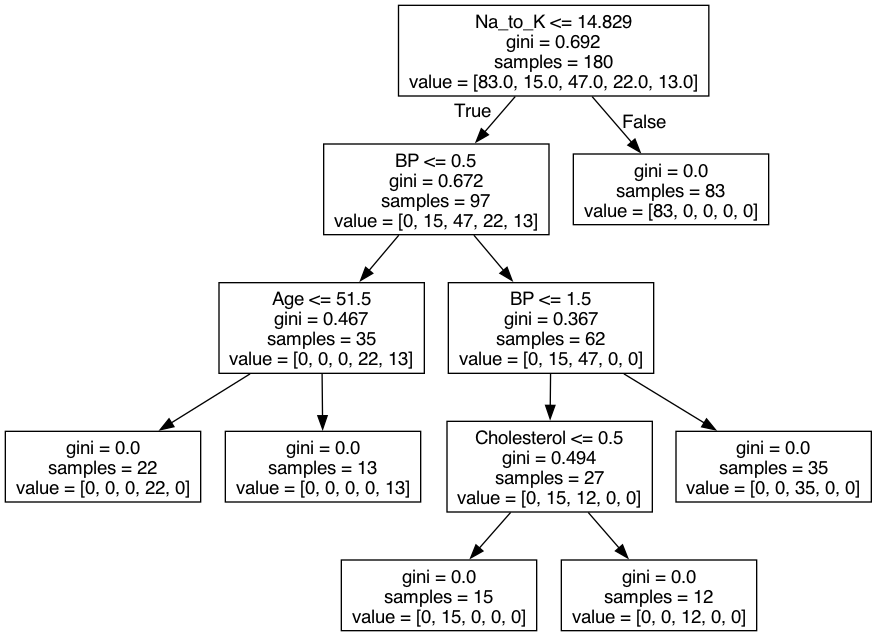

In [359]:
from sklearn.tree import export_graphviz
import os
# Export the decision tree to a .dot file
dot_data = export_graphviz(decisionTree, out_file="tree.dot", feature_names=X.columns)

# Install graphviz if not already available
# !pip install graphviz

# Render the .dot file into an image
os.system("dot -Tpng tree.dot -o tree.png")

# Display the generated image
from IPython.display import Image
Image(filename="tree.png", width=800, height=800)

In [360]:
from sklearn.tree import export_text

# Generate and print the textual representation of the decision tree
tree_text = export_text(decisionTree)
print(tree_text)

|--- feature_4 <= 14.83
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 51.50
|   |   |   |--- class: 3.0
|   |   |--- feature_0 >  51.50
|   |   |   |--- class: 4.0
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 2.0
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: 2.0
|--- feature_4 >  14.83
|   |--- class: 0.0



#### Inspect the dataset titled lab01_dataset_2.csv which also has a mixture of numerical and categorical data. For this problem, you will use decision tree classifiers for supervised learning. In particular, you will be using the functionalities of the sklearn.tree library. The classification task using sklearn libraries work only on numerical-valued attributes, and not on categorical ones. (What to do now? Hint: Look up One-hot Encoding and Integer Encoding). Here are all the required tasks –

# Using Hot Encoding

In [399]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [362]:
data = pd.read_csv('lab01_dataset_2.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [363]:
print("gender Unique : " + data['Sex'].unique())
print("BP Unique : " + data['BP'].unique())
print("Cholesterol Unique : " + data['Cholesterol'].unique())
print("Output Unique : " + data['Output'].unique())

['gender Unique : F' 'gender Unique : M']
['BP Unique : HIGH' 'BP Unique : LOW' 'BP Unique : NORMAL']
['Cholesterol Unique : HIGH' 'Cholesterol Unique : NORMAL']
['Output Unique : drugY' 'Output Unique : drugC' 'Output Unique : drugX'
 'Output Unique : drugA' 'Output Unique : drugB']


# 1. Restructure the dataset such that it has all numerical-valued attributes. (2 marks)

In [364]:
oneHotEncoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
oneHotEncoder.set_output(transform='pandas')

oneHotEncoderTransform = oneHotEncoder.fit_transform(data[['Sex', 'Cholesterol', 'BP', 'Output']])

oneHotEncoderTransform.head()

,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [365]:
oneHotEncoderTransform.columns

Index(['Sex_F', 'Sex_M', 'Cholesterol_HIGH', 'Cholesterol_NORMAL', 'BP_HIGH',
       'BP_LOW', 'BP_NORMAL', 'Output_drugA', 'Output_drugB', 'Output_drugC',
       'Output_drugX', 'Output_drugY'],
      dtype='object')

In [366]:
X = pd.DataFrame(
    { 
        'Sex_F' : oneHotEncoderTransform['Sex_F'],
        'Sex_M' : oneHotEncoderTransform['Sex_M'],
        'Cholesterol_HIGH' : oneHotEncoderTransform['Cholesterol_HIGH'],
        'Cholesterol_NORMAL' : oneHotEncoderTransform['Cholesterol_NORMAL'],
        'BP_HIGH' : oneHotEncoderTransform['BP_HIGH'],
        'BP_LOW' : oneHotEncoderTransform['BP_LOW'],
        'BP_NORMAL' : oneHotEncoderTransform['BP_NORMAL'],
        'Na_to_K' : data['Na_to_K']
    }
)

Y = pd.DataFrame(
    { 
        'Output_drugA' :list(oneHotEncoderTransform['Output_drugA']),
        'Output_drugB' :list(oneHotEncoderTransform['Output_drugB']),
        'Output_drugC' :list(oneHotEncoderTransform['Output_drugC']),
        'Output_drugX' :list(oneHotEncoderTransform['Output_drugX']),
        'Output_drugY' :list(oneHotEncoderTransform['Output_drugY']),
    }
)
Y.head()

,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [367]:
X.head()

,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL,Na_to_K
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,25.355
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.093
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,10.114
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.798
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,18.043


#### 2. Perform supervised learning using decision tree classifiers. Employ the train-test split approach during the learning. (4 marks)

In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state = 12)

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(180, 8)
(20, 8)
(180, 5)
(20, 5)


In [376]:
Y_train.head()

,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
185,0.0,0.0,0.0,0.0,1.0
166,0.0,0.0,0.0,0.0,1.0
101,1.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,1.0,0.0
113,0.0,0.0,0.0,1.0,0.0


In [369]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)
y_pred = decisionTree.predict(X_test)
y_pred

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

#### 3) After the learning is complete, show the results by predicting the class of the test set. Display the results of the prediction and test set side-by-side. (2 marks)


In [379]:
Y_test.head()

,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
23,0.0,0.0,0.0,0.0,1.0
182,0.0,0.0,0.0,1.0,0.0
172,0.0,0.0,0.0,0.0,1.0
21,0.0,0.0,0.0,0.0,1.0
63,0.0,0.0,0.0,1.0,0.0


In [408]:
predOutputDrugA	= list()
predOutputDrugB = list()
predOutputDrugC	= list()
predOutputDrugX	= list()	
predOutputDrugY	= list()

for i in range(0, len(y_pred)):
    predOutputDrugA.append(y_pred[i][0])
    predOutputDrugB.append(y_pred[i][1])
    predOutputDrugC.append(y_pred[i][2])
    predOutputDrugX.append(y_pred[i][3])
    predOutputDrugY.append(y_pred[i][4])

print(predOutputDrugA)
print(predOutputDrugB)
print(predOutputDrugC)
print(predOutputDrugX)
print(predOutputDrugY)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [409]:
actual_predicted  = pd.DataFrame(
    {
        'pred_Output_DrugA'	: predOutputDrugA,
        'actual_Output_drugA' : Y_test['Output_drugA'],
        'predOutput_DrugB' : predOutputDrugB,
        'actual_Output_drugB' : Y_test['Output_drugB'],
        'pred_Output_DrugC' : predOutputDrugC,
        'actual_Output_drugC' : Y_test['Output_drugC'],
        'pred_Output_DrugX' : predOutputDrugX,
        'actual_Output_drugX' : Y_test['Output_drugX'],
        'pred_Output_DrugY' : predOutputDrugY,
        'actual_Output_drugY' : Y_test['Output_drugY']
    }
)
actual_predicted.head(10)

,pred_Output_DrugA,actual_Output_drugA,predOutput_DrugB,actual_Output_drugB,pred_Output_DrugC,actual_Output_drugC,pred_Output_DrugX,actual_Output_drugX,pred_Output_DrugY,actual_Output_drugY
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
182,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
63,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


#### 4. Output the decision tree; it can be either a textual representation or a graphical representation. (2 marks)

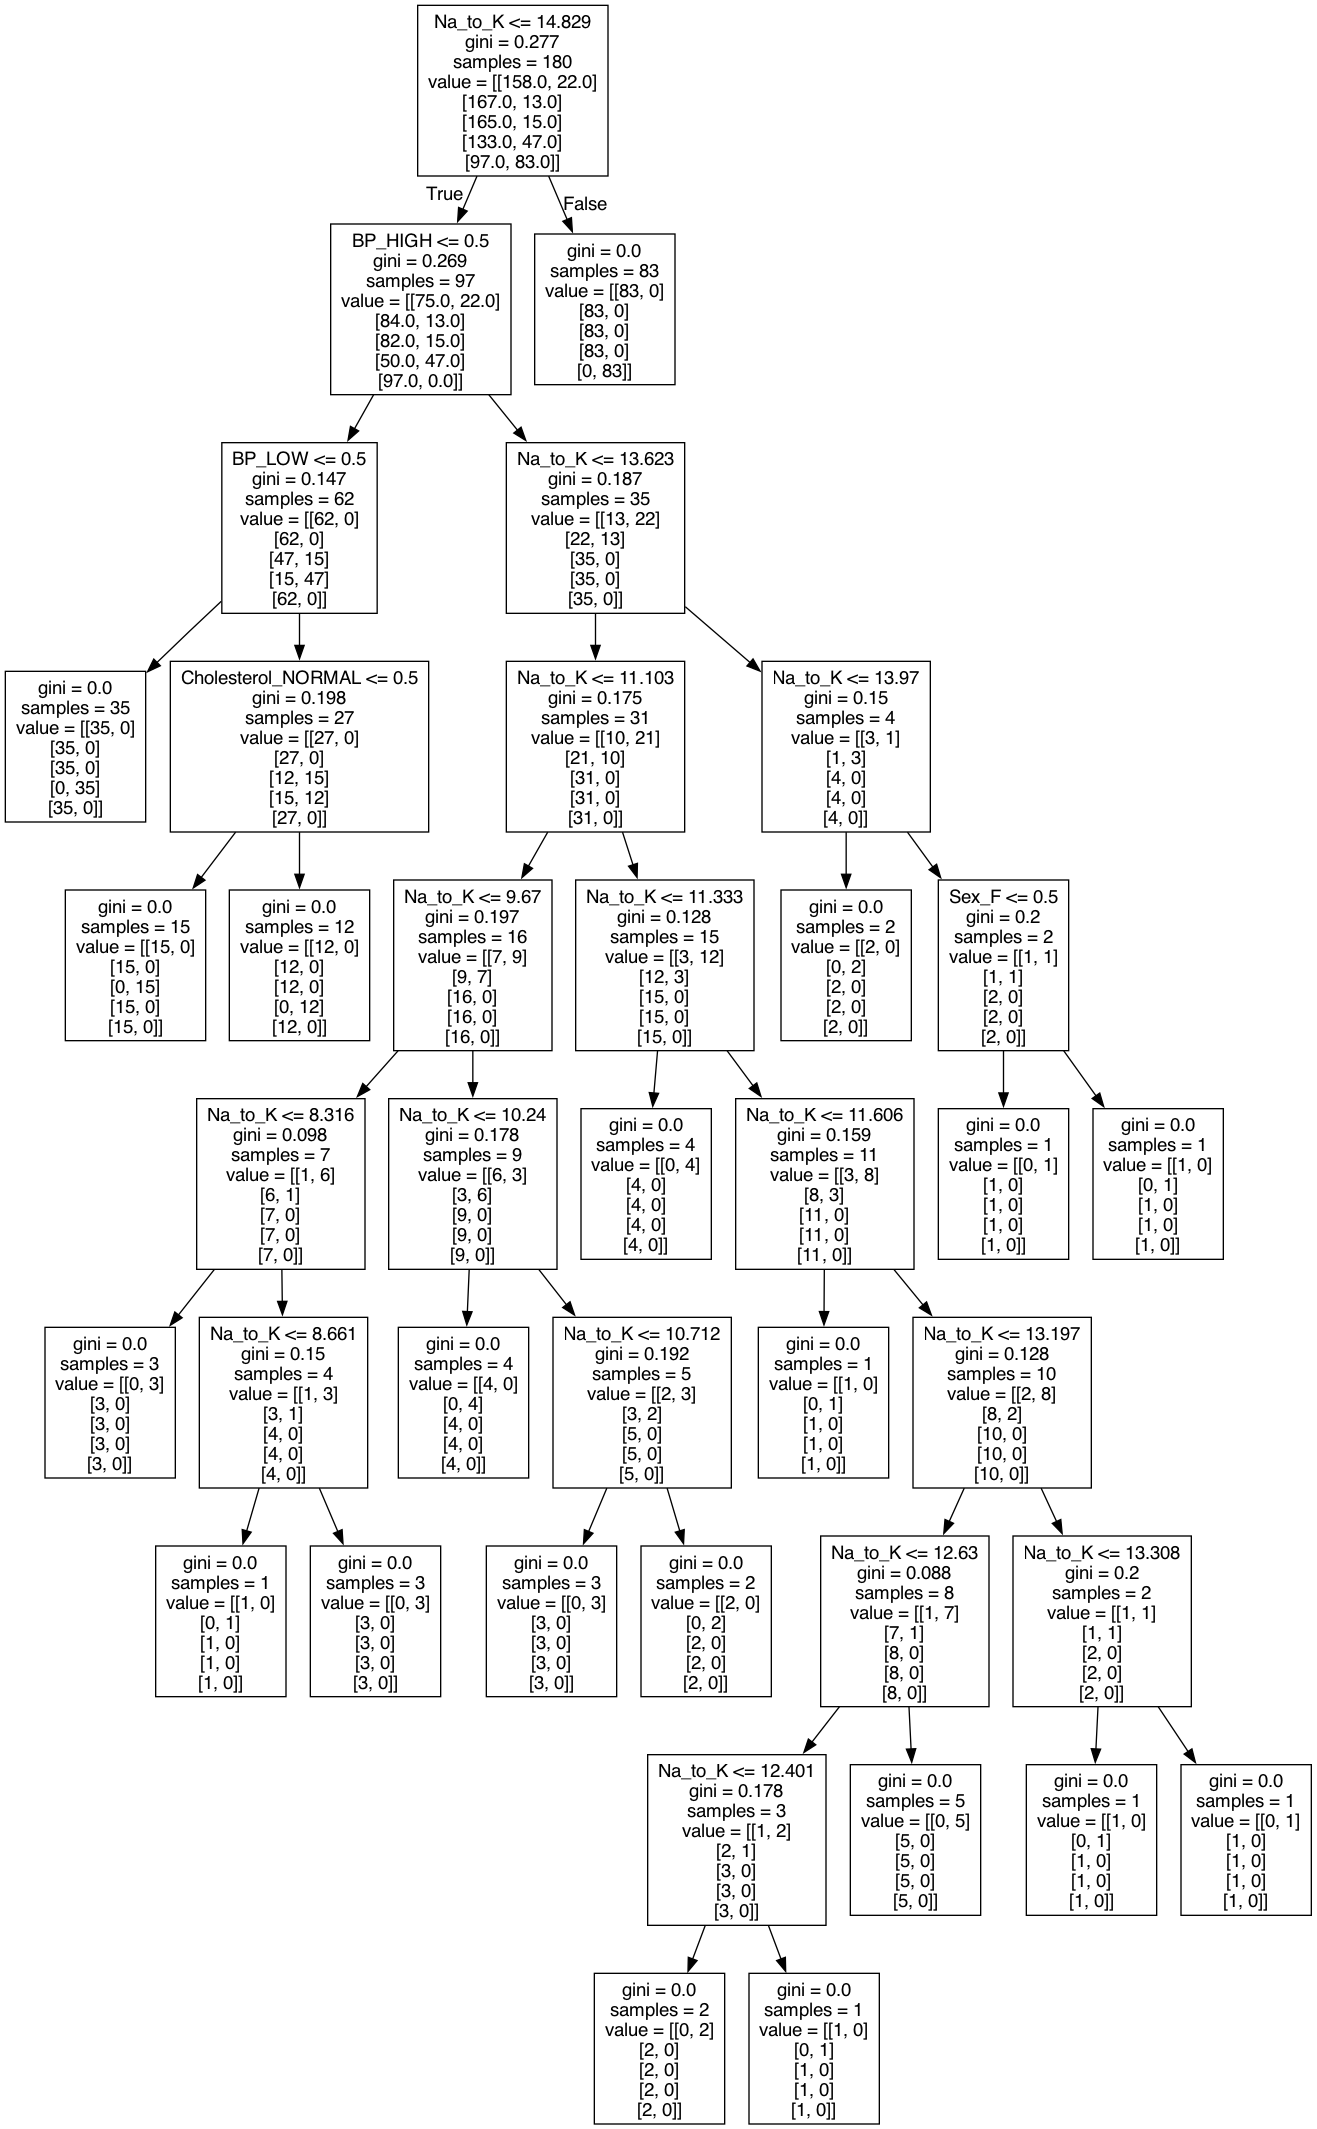

In [410]:
export_graphviz(decisionTree, out_file="tree.dot", feature_names=X.columns)
os.system("dot -Tpng tree.dot -o tree.png")

Image(filename="tree.png", width=800, height=800)

In [411]:
textRepresentation = export_text(decisionTree)
print(textRepresentation)

|--- feature_7 <= 14.83
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_7 <= 13.62
|   |   |   |--- feature_7 <= 11.10
|   |   |   |   |--- feature_7 <= 9.67
|   |   |   |   |   |--- feature_7 <= 8.32
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  8.32
|   |   |   |   |   |   |--- feature_7 <= 8.66
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  8.66
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  9.67
|   |   |   |   |   |--- feature_7 <= 10.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  10.24
|   |   |   |   |   |   |--- feature_7 <= 10.71
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >